In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras import Sequential
from keras.layers import Dense
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('bankloan.csv')

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
df = df.dropna()
NanCheck = df.isna().any()
if 'Loan_ID' in df.columns:
    df = df.drop('Loan_ID', axis = 1)
df['LoanAmount'] = (df['LoanAmount'] * 1000 ).astype(int)
Counter(df['Loan_Status'])#['Y']/df['Loan_Status'].size

Counter({'N': 148, 'Y': 332})

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267000,360.0,1.0,Urban,Y


In [6]:
pre_y = df['Loan_Status']
pre_X = df.drop('Loan_Status', axis = 1)
dum_X = pd.get_dummies(pre_X)
dum_y = pre_y.map(dict(Y = 1, N = 0))
dum_X.head(10)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1.0,4583,1508.0,128000,360.0,1.0,0,1,0,1,1,0,1,0,1,0,0
2,0.0,3000,0.0,66000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
3,0.0,2583,2358.0,120000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
4,0.0,6000,0.0,141000,360.0,1.0,0,1,1,0,1,0,1,0,0,0,1
5,2.0,5417,4196.0,267000,360.0,1.0,0,1,0,1,1,0,0,1,0,0,1
6,0.0,2333,1516.0,95000,360.0,1.0,0,1,0,1,0,1,1,0,0,0,1
7,3.0,3036,2504.0,158000,360.0,0.0,0,1,0,1,1,0,1,0,0,1,0
8,2.0,4006,1526.0,168000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1
9,1.0,12841,10968.0,349000,360.0,1.0,0,1,0,1,1,0,1,0,0,1,0
10,2.0,3200,700.0,70000,360.0,1.0,0,1,0,1,1,0,1,0,0,0,1


In [7]:
dum_y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64

In [8]:
smote = SMOTE(sampling_strategy=0.9 )
X1, y = smote.fit_resample(dum_X, dum_y)
sc = MinMaxScaler()
X = sc.fit_transform(X1)

In [9]:
Counter(y)

Counter({0: 298, 1: 332})

In [10]:
X_train , X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state= 42, shuffle= True) 

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [17]:
classifier = Sequential()

# Add layers
# Reduced the number of neurons and added dropout layers for regularization
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal', input_dim=X_train.shape[1]))
classifier.add(Dropout(0.2))  # Dropout layer to prevent overfitting
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dropout(0.2))  # Another dropout layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to stop training when the validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
classifier.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, callbacks=[early_stopping], validation_split=0.1)

# Evaluate the model
eval_model = classifier.evaluate(X_train, y_train)
print("Loss:", eval_model[0], "Accuracy:", eval_model[1])

16/16 [==============================] - 0s 1ms/step - loss: 0.3594 - accuracy: 0.8472
Loss: 0.359381765127182 Accuracy: 0.8472222089767456


In [18]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

4/4 [==============================] - 0s 2ms/step


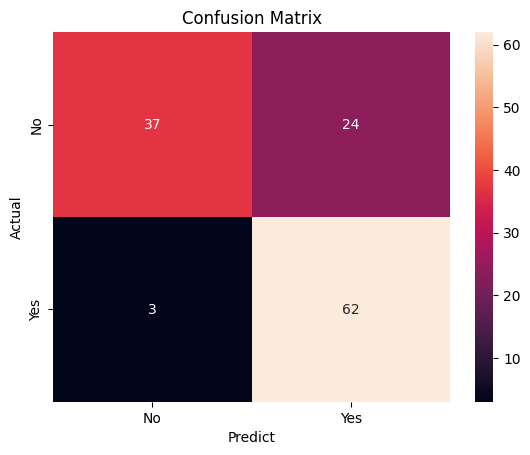

In [19]:
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot= True, ax=ax)
ax.set_xlabel('Predict');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']);ax.yaxis.set_ticklabels(['No','Yes']);

In [20]:
import pickle
import joblib
filename = 'loan_model.pkl'
joblib.dump(classifier, filename)

['loan_model.pkl']